<a href="https://colab.research.google.com/github/AleBoattini/Cartera/blob/main/Analisis_de_Demanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento

Este conjunto de datos se obtuvo del Repositorio de aprendizaje automático de la Universidad de California, conjunto de datos de pedidos de pronóstico de demanda diaria de Irvine (UC Irvine) . La página de UCI menciona la siguiente publicación como la fuente original del conjunto de datos:

Ferreira, RP, Martiniano, A., Ferreira, A., Ferreira, A., & Sassi, RJ (2016). Estudio de previsión de demanda diaria de pedidos mediante red neuronal artificial. Transacciones de América Latina del IEEE, 14(3), 1519-1525

In [16]:
url='https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Daily%20Demand%20Forecasting%20Orders/Daily_Demand_Forecasting_Orders.csv'


# Introduccion

Este conjunto de datos de nivel intermedio tiene 60 filas y 13 columnas. El conjunto de datos fue recolectado durante 60 días, esta es una base de datos real de una empresa de logística brasileña. El conjunto de datos tiene doce atributos predictivos y un objetivo que es el total de pedidos para el tratamiento diario.

## Diccionario de datos

| Posición de la columna | Nombre del atributo | Definición | Tipo de datos | Ejemplo | % Coeficientes nulos |
|------------------- |------------------------------------------- ---------------- |--------------------------------- ---------------------------------------------- |--- ----------- |--------------------------- |---------- ----- |
| 1 | Semana del mes | Semana del mes (1: primera, 2: segunda, 3: tercera, 4: cuarta, 5: quinta) | Cuantitativo | 1, 2, 3 | 0 |
| 2 | Día de la semana | Día de la semana (2: lunes, 3: martes, 4: miércoles, 5: jueves, 6: viernes) | Cuantitativo | 2, 3, 4 | 0 |
| 3 | Pedido no urgente | Pedido no urgente | Cuantitativo | 171.297, 220.343, 127.805 | 0 |
| 4 | Pedido urgente | Pedido urgente | Cuantitativo | 127.667, 141.406, 114.813 | 0 |
| 5 | Orden tipo A | Orden tipo A | Cuantitativo | 41.542, 46.241, 39.025 | 0 |
| 6 | Orden tipo B | Orden tipo B | Cuantitativo | 113.294, 120.865, 110.74 | 0 |
| 7 | Orden tipo C | Orden tipo C | Cuantitativo | 162.284, 196.296, 94.47 | 0 |
| 8 | Órdenes del sector fiscal | Órdenes del sector fiscal | Cuantitativo | 18.156, 1.653, 1.617 | 0 |
| 9 | Pedidos del sector de los controladores de tráfico | Pedidos del sector de los controladores de tráfico | Cuantitativo | 49971, 34878, 33366 | |
| 10 | Órdenes bancarias (1) | Órdenes bancarias (1) | Cuantitativo | 33703, 32905, 21103 | 0 |
| 11 | Órdenes bancarias (2) | Órdenes bancarias (2) | Cuantitativo | 69054, 117137, 84558 | 0 |
| 12 | Órdenes bancarias (3) | Órdenes bancarias (3) | Cuantitativo | 18423, 29188, 16683 | 0 |
| 13 | Objetivo (Total de pedidos) | Objetivo (Total de pedidos) | Cuantitativo | 317.12, 363.402, 244.235 | 0 |
---

# EDA (Analisis explotario de datos)

Se importan las librerias a usar:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Se carga el CSV y se asigna el nombre a las columnas:

In [18]:
df=pd.read_csv(url, ';', thousands='.');
names=['SEMANA DEL MES', 'DIA DE LA SEMANA', 'PEDIDO NO URGENTE', 'PEDIDO URGENTE', 'ORDEN A', 'ORDEN B', 'ORDEN C', 'ORDEN FISCAL', 'PEDIDOS DE TRAFICO', 'ORDEN BANCARIA 1', 'ORDEN BANCARIA 2', 'ORDEN BANCARIA 3', 'TOTAL DE PEDIDOS']
df.columns=names

df=df.replace('.','')

df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,SEMANA DEL MES,DIA DE LA SEMANA,PEDIDO NO URGENTE,PEDIDO URGENTE,ORDEN A,ORDEN B,ORDEN C,ORDEN FISCAL,PEDIDOS DE TRAFICO,ORDEN BANCARIA 1,ORDEN BANCARIA 2,ORDEN BANCARIA 3,TOTAL DE PEDIDOS
0,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577
1,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675
2,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,129412
3,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,317120
4,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,210517


Se indentifica las columnas y sus entradas de datos


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SEMANA DEL MES      60 non-null     int64
 1   DIA DE LA SEMANA    60 non-null     int64
 2   PEDIDO NO URGENTE   60 non-null     int64
 3   PEDIDO URGENTE      60 non-null     int64
 4   ORDEN A             60 non-null     int64
 5   ORDEN B             60 non-null     int64
 6   ORDEN C             60 non-null     int64
 7   ORDEN FISCAL        60 non-null     int64
 8   PEDIDOS DE TRAFICO  60 non-null     int64
 9   ORDEN BANCARIA 1    60 non-null     int64
 10  ORDEN BANCARIA 2    60 non-null     int64
 11  ORDEN BANCARIA 3    60 non-null     int64
 12  TOTAL DE PEDIDOS    60 non-null     int64
dtypes: int64(13)
memory usage: 6.2 KB


Se busca la existencia de valores nulos o vacios

In [20]:
df.isnull().sum()

SEMANA DEL MES        0
DIA DE LA SEMANA      0
PEDIDO NO URGENTE     0
PEDIDO URGENTE        0
ORDEN A               0
ORDEN B               0
ORDEN C               0
ORDEN FISCAL          0
PEDIDOS DE TRAFICO    0
ORDEN BANCARIA 1      0
ORDEN BANCARIA 2      0
ORDEN BANCARIA 3      0
TOTAL DE PEDIDOS      0
dtype: int64

### Diagrama de Caja y Bigote
Es una forma muy rapida de visualizar el rango de datos y sus outliers, pero al ver que esta muestra solo tiene informacion de 60 semanas. Se evitara en lo posible descartar informacion. Se evaluara segun el comportamiento del modelo. 

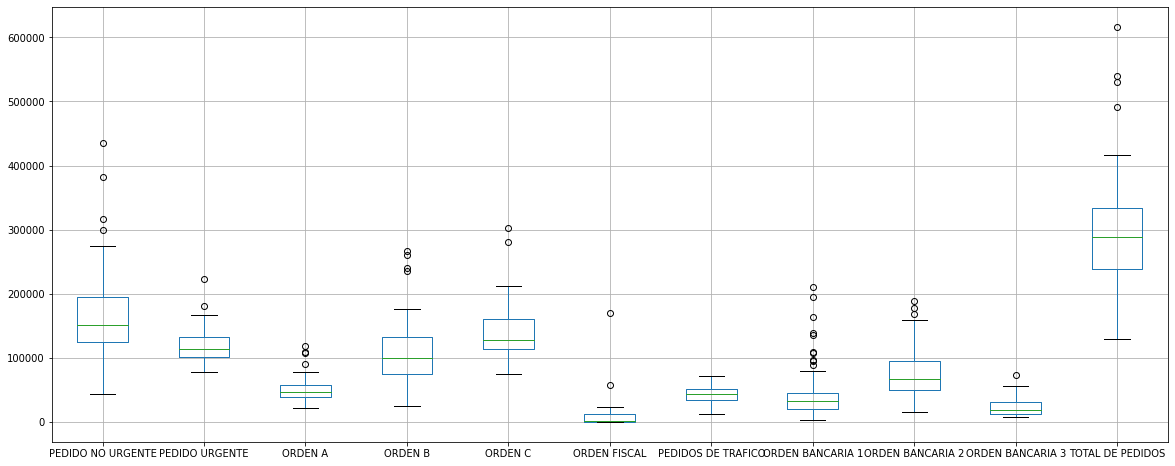

In [21]:
df[['PEDIDO NO URGENTE', 'PEDIDO URGENTE', 'ORDEN A', 'ORDEN B', 'ORDEN C', 'ORDEN FISCAL', 'PEDIDOS DE TRAFICO', 'ORDEN BANCARIA 1', 'ORDEN BANCARIA 2', 'ORDEN BANCARIA 3', 'TOTAL DE PEDIDOS']].boxplot(figsize=(20,8))

### Mapa de Calor y Correlacion

Se visualiza un mapa de calor con las correlacion para entender como estan relacionadas entre ellas las variables, es de esperar que tenga relacion directa con los LOS PEDIDOS, dado el total es la suma de ambos, pero el interes esta en las demas variables.

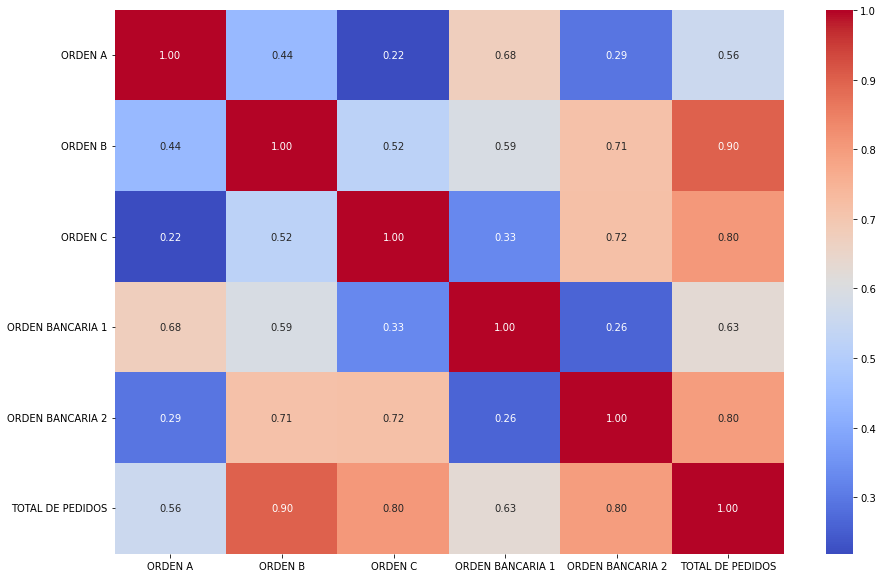

In [22]:
corr_matriz=df[['ORDEN A', 'ORDEN B', 'ORDEN C', 'ORDEN BANCARIA 1', 'ORDEN BANCARIA 2', 'TOTAL DE PEDIDOS']].corr()

# visualizar la matriz de correlación en un mapa de calor
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matriz, cmap='coolwarm', annot=True, fmt='.2f')
# mostrar el gráfico
plt.show()

### Grafico de lineas

Con el fin de ver como evolucionan los datos a lo largo de las semanas, realizamos un grafico de lineas con las variables que dieron una correlacion igual o mayor al 80% con el TOTAL DE PEDIDOS. 

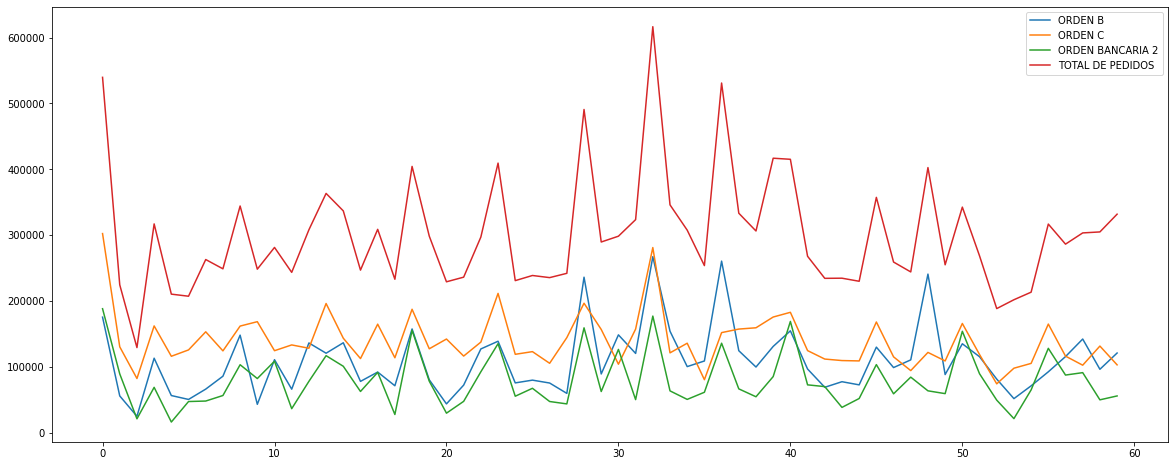

In [23]:
df[['ORDEN B', 'ORDEN C', 'ORDEN BANCARIA 2', 'TOTAL DE PEDIDOS']].plot(figsize=(20,8))
# mostrar el gráfico
plt.show()

Y en primeras impresiones podemos notar como comparten picos. Por lo que es de esperar que sean variables importantes a la hora de predecir la demanda. metodos que veremos a continuacion.

# Otra cosa mariposa

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [25]:
# Separo los dataframe en entrenamiento y prueba

n=len(df)*0.8
df_train=df.copy().loc[:n]
df_test=df.copy().loc[n:]

In [26]:
# Separo las variables
explicativas=df_train.drop('TOTAL DE PEDIDOS',axis=1)
objetivo=df_train['TOTAL DE PEDIDOS']

# Entreno el modelo
regresion=LinearRegression()
regresion.fit(explicativas,objetivo)

# Evaluo las prediccion
x_test=df_test.drop('TOTAL DE PEDIDOS',axis=1)
y_test=df_test['TOTAL DE PEDIDOS']
predi=regresion.predict(x_test)

vista=df_test['TOTAL DE PEDIDOS']
prediccion=pd.DataFrame(predi)

vista=pd.DataFrame(vista)
vista.reset_index(drop=True, inplace=True)

vista=vista.join(prediccion)

In [27]:
vista

,TOTAL DE PEDIDOS,0
0,402607,402607.0
1,255061,255061.0
2,342606,342606.0
3,268640,268640.0
4,188601,188601.0
5,202022,202022.0
6,213509,213509.0
7,316849,316849.0
8,286412,286412.0
9,303447,303447.0


# RandomForestRegressor
Entre los metodos de regresion conocidos el RandomForestRegressor utiliza regresion y clasificacion para poder predecir el comportamiento de un conjunto de datos. Por lo que evaluaremos su comportamiento.

El promedio de error de las predicciones fue:  -3.82 % 



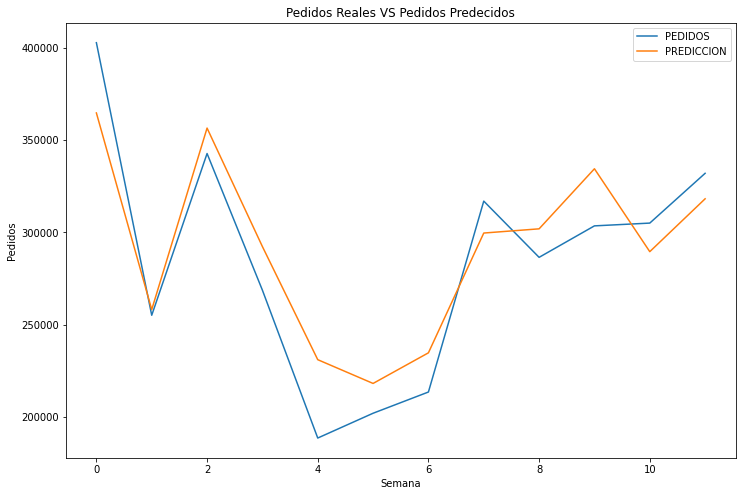

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos
# (asumiendo que tienes tus datos en un dataframe de pandas llamado "df")

X=df_train.drop('TOTAL DE PEDIDOS',axis=1)
y=df_train['TOTAL DE PEDIDOS']

x_test=df_test.drop('TOTAL DE PEDIDOS',axis=1)
y_test=df_test['TOTAL DE PEDIDOS']

# Crear un modelo de Random Forest Regression
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rfr.fit(X, y)

# Predecir los valores para el conjunto de prueba
y_pred = rfr.predict(x_test).round().astype(int)

# Crear un DF que compare la prueba con los pedidos
vista=df_test['TOTAL DE PEDIDOS']
prediccion=pd.DataFrame(y_pred)

vista=pd.DataFrame(vista)
vista.reset_index(drop=True, inplace=True)

vista=vista.join(prediccion)

vista.columns=['PEDIDOS', 'PREDICCION']

# Calculo el % de error
Error=((vista.PEDIDOS-vista.PREDICCION)/vista.PEDIDOS).mean()*100
Error=Error.round(2)
print('El promedio de error de las predicciones fue: ',Error,'%','\n')

# Se grafica los resultados en comparacion
vista.plot(figsize=(12,8))
plt.title('Pedidos Reales VS Pedidos Predecidos')
plt.ylabel('Pedidos')
plt.xlabel('Semana')
plt.show()

# Importancia de las variables
Siempre se intenta reducir la dimensionalidad de los dataframe para no afectar el rendimiento de los calculos con variables que quizas no son prioridad para poder estimar o conocer el comportamiento de las demas. Por eso con un diagrama de Pareto identificamos de cuales se podria persistir en caso de ser necesario optimizar el proceso.

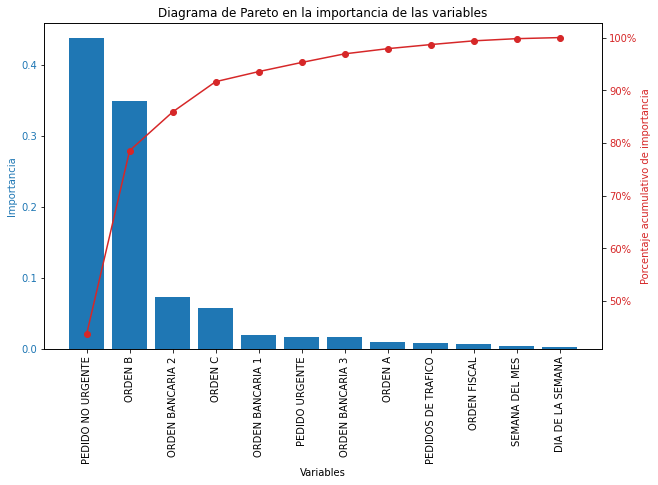

In [64]:
# Librerias

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MultipleLocator

# Obtener la importancia de las características
importances = rfr.feature_importances_
feature_names = X.columns

importance = list(zip(feature_names, importances))
importance.sort(key=lambda x: x[1], reverse=True)
sorted_features, importances = zip(*importance)

cumulative_importance = np.cumsum(importances)
total_importance = np.sum(importances)
cumulative_percentage = 100 * cumulative_importance / total_importance

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.bar(sorted_features, importances, color=color)
ax1.set_xlabel('Variables')
ax1.set_ylabel('Importancia', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(sorted_features, cumulative_percentage, color=color, marker='o')
ax2.set_ylabel('Porcentaje acumulativo de importancia', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.yaxis.set_major_locator(MultipleLocator(10))

plt.title('Diagrama de Pareto en la importancia de las variables')
plt.show()

El 20% de las causas representan el 80% de los hechos, esa es la forma de interpretar el diagrama. Donde claramente se ve como solo conciderando los pedidos no urgentes y las Ordenes B se puede llegar a los mismos resultados anteriores. 

# Regresion lineal